In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


Load the .npy file and extract the first frame

uint16


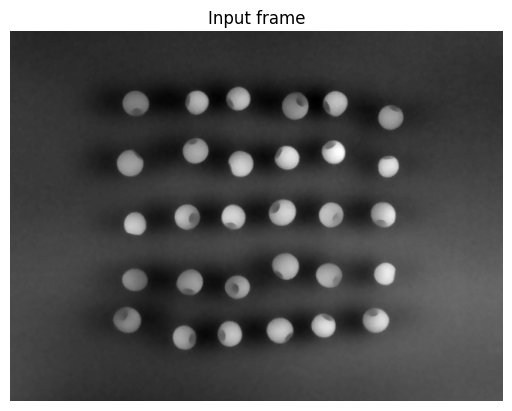

In [2]:
data = np.load('./SavedData/thirtyBadSeed.npy', allow_pickle=True).astype(np.uint16)
print(data.dtype)
frame = data[400]
plt.imshow(frame, cmap='gray')
plt.title('Input frame')
plt.axis('off')
plt.show()

In [3]:
print('The shape of each frame of data is:',frame.shape)

The shape of each frame of data is: (480, 640)


Preprocess the frame by applying Gaussian blur to reduce noise

uint16


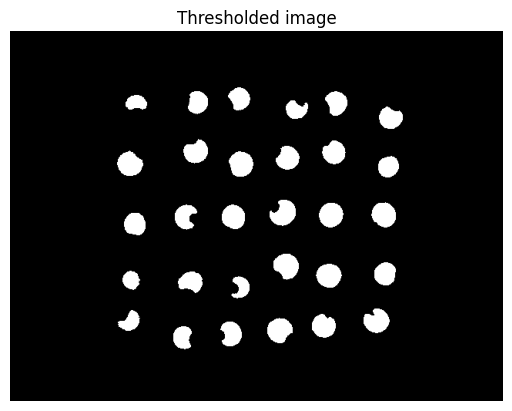

In [4]:
# Choose a threshold value that works well for your image, 8772 is by maual testing
threshold_value = 8878

# Threshold the image
ret, thresh = cv2.threshold(frame, threshold_value, 255, cv2.THRESH_BINARY)
print(thresh.dtype)

# Display the thresholded image
plt.imshow(thresh, cmap='gray')
plt.title('Thresholded image')
plt.axis('off')
plt.show()

In [5]:
thresh_copy = thresh
def expand_seed(image, x, y):
    seed_positions = []
    dx = [-1, 0, 1, 0]
    dy = [0, -1, 0, 1]

    image[x][y] = 0
    seed_positions.append([x, y])
    for k in range(4):
        new_x, new_y = x + dx[k], y + dy[k]
        if (new_x >= 0 and new_x < 480 and new_y >= 0 and new_y < 640 and image[new_x][new_y] == 255):
            seed_positions += expand_seed(image, new_x, new_y)

    return seed_positions

    


# Initialize the dictionary of seed coordinates
seed_coords = {}
count = 0

# Traverse through all the pixels in the image
for x in range(thresh_copy.shape[0]):
    for y in range(thresh_copy.shape[1]):
        if thresh_copy[x, y] == 255:
            count+=1
            seed_pixels = expand_seed(thresh_copy, x, y)
            seed_name = f'seed {count}'
            seed_coords[seed_name] = seed_pixels

            # Update thresh_copy to remove the expanded seed pixels
            for pixel in seed_pixels:
                thresh_copy[pixel[0], pixel[1]] = 0

for key in seed_coords:
    print(key, len(seed_coords[key]))
print(count)

seed 1 613
seed 2 605
seed 3 664
seed 4 414
seed 5 498
seed 6 662
seed 7 718
seed 8 694
seed 9 700
seed 10 796
seed 11 808
seed 12 590
seed 13 791
seed 14 797
seed 15 792
seed 16 634
seed 17 755
seed 18 657
seed 19 817
seed 20 667
seed 21 798
seed 22 412
seed 23 638
seed 24 435
seed 25 779
seed 26 463
seed 27 727
seed 28 797
seed 29 670
seed 30 565
30


In [6]:
seed_curve_mean = {}
seed_curve_std = {}
for picture in data:
    for tag in seed_coords:
        tag_size = len(seed_coords[tag])
        tag_seed_vals = []
        for i in range(tag_size):
            x,y = seed_coords[tag][i][0], seed_coords[tag][i][1]
            tag_seed_vals.append(picture[x][y])
        tag_seed_val_mean = np.mean(tag_seed_vals)
        tag_seed_val_std = np.std(tag_seed_vals)
        seed_curve_mean.setdefault(tag, []).append(tag_seed_val_mean)
        seed_curve_std.setdefault(tag, []).append(tag_seed_val_std)

# print(seed_curve)
print(len(seed_curve_mean['seed 24']))
print(len(seed_curve_std['seed 24']))

# x = list(range(1, 901))
# fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10, 15))

# for tag, values in seed_curve_mean.items():
#     ax1.plot(x, values, label=tag)
# for tag, values in seed_curve_std.items():
#     ax2.plot(x, values, label=tag)


# ax1.set_ylabel('Mean Temperature')
# ax2.set_ylabel('Standard Deviation')
# ax2.set_xlabel('Time')
# ax1.legend()
# ax2.legend()
# plt.show()

900
900


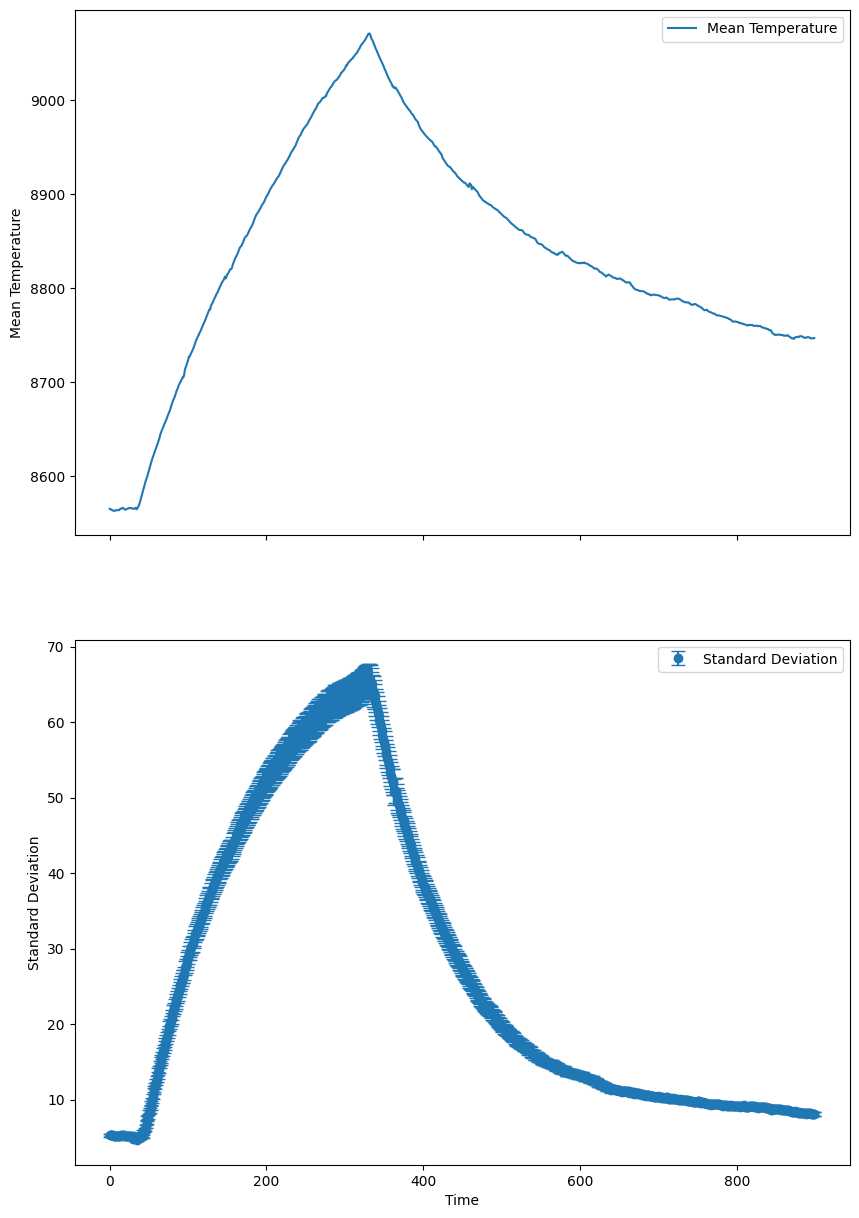

In [7]:
# Create subplots for the mean and standard deviation curves
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10, 15))

# Plot the mean curve for all seeds
all_seeds_mean = [seed_curve_mean[tag] for tag in seed_curve_mean.keys()]
ax1.plot(np.mean(all_seeds_mean, axis=0), label='Mean Temperature')

# Compute the standard deviation and standard error for all seeds
all_seeds_std = [seed_curve_std[tag] for tag in seed_curve_std.keys()]
all_seeds_stderr = [seed_curve_std[tag] / np.sqrt(len(seed_curve_std[tag])) for tag in seed_curve_std.keys()]

# Create the error bar plot for the standard deviation
ax2.errorbar(range(len(all_seeds_std[0])), np.mean(all_seeds_std, axis=0), yerr=np.mean(all_seeds_stderr, axis=0), fmt='o', capsize=5, label='Standard Deviation')

# Set the axis labels and legend
ax1.set_ylabel('Mean Temperature')
ax2.set_ylabel('Standard Deviation')
ax2.set_xlabel('Time')
ax1.legend()
ax2.legend()

# Show the plot
plt.show()


uint16


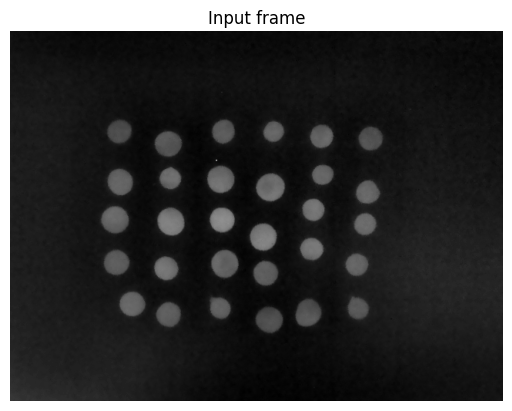

In [8]:
data2 = np.load('./SavedData/thirtyGoodSeed.npy', allow_pickle=True).astype(np.uint16)
print(data2.dtype)
frame2 = data2[850]
plt.imshow(frame2, cmap='gray')
plt.title('Input frame')
plt.axis('off')
plt.show()

uint16


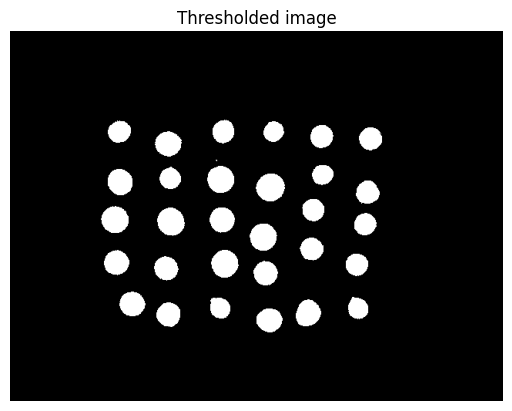

In [9]:
threshold_value2 = 8737

# Threshold the image
ret2, thresh2 = cv2.threshold(frame2, threshold_value2, 255, cv2.THRESH_BINARY)
print(thresh2.dtype)

# Display the thresholded image
plt.imshow(thresh2, cmap='gray')
plt.title('Thresholded image')
plt.axis('off')
plt.show()

In [10]:
thresh_copy2 = thresh2
def expand_seed(image, x, y):
    seed_positions = []
    dx = [-1, 0, 1, 0]
    dy = [0, -1, 0, 1]

    image[x][y] = 0
    seed_positions.append([x, y])
    for k in range(4):
        new_x, new_y = x + dx[k], y + dy[k]
        if (new_x >= 0 and new_x < 480 and new_y >= 0 and new_y < 640 and image[new_x][new_y] == 255):
            seed_positions += expand_seed(image, new_x, new_y)

    return seed_positions

    


# Initialize the dictionary of seed coordinates
seed_coords2 = {}
count2 = 0

# Traverse through all the pixels in the image
for x in range(thresh_copy2.shape[0]):
    for y in range(thresh_copy2.shape[1]):
        if thresh_copy2[x, y] == 255:
            count2+=1
            seed_pixels2 = expand_seed(thresh_copy2, x, y)
            if len(seed_pixels2) > 20:
                seed_name2 = f'seed {count2}'
                seed_coords2[seed_name2] = seed_pixels2

            # Update thresh_copy to remove the expanded seed pixels
            for pixel2 in seed_pixels2:
                thresh_copy2[pixel2[0], pixel2[1]] = 0

for key2 in seed_coords2:
    print(key2, len(seed_coords2[key2]))
print(count2-1)

seed 1 671
seed 2 664
seed 3 547
seed 4 695
seed 5 695
seed 6 862
seed 8 564
seed 9 963
seed 10 603
seed 11 872
seed 12 1051
seed 13 713
seed 14 655
seed 15 968
seed 16 1008
seed 17 835
seed 18 647
seed 19 972
seed 20 693
seed 21 814
seed 22 984
seed 23 663
seed 24 752
seed 25 770
seed 26 828
seed 27 581
seed 28 581
seed 29 872
seed 30 770
seed 31 814
30


In [14]:
seed_curve_mean2 = {}
seed_curve_std2 = {}
for picture2 in data2:
    for tag2 in seed_coords2:
        tag_size2 = len(seed_coords2[tag2])
        tag_seed_vals2 = []
        for i in range(tag_size2):
            x,y = seed_coords2[tag2][i][0], seed_coords2[tag2][i][1]
            tag_seed_vals2.append(picture2[x][y])
        tag_seed_val_mean2 = np.mean(tag_seed_vals2)
        tag_seed_val_std2 = np.std(tag_seed_vals2)
        seed_curve_mean2.setdefault(tag2, []).append(tag_seed_val_mean2)
        seed_curve_std2.setdefault(tag2, []).append(tag_seed_val_std2)

# print(seed_curve)
print(len(seed_curve_mean2['seed 24']))
print(len(seed_curve_std2['seed 24']))

# x = list(range(1, 901))
# fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10, 15))

# for tag, values in seed_curve_mean.items():
#     ax1.plot(x, values, label=tag)
# for tag, values in seed_curve_std.items():
#     ax2.plot(x, values, label=tag)


# ax1.set_ylabel('Mean Temperature')
# ax2.set_ylabel('Standard Deviation')
# ax2.set_xlabel('Time')
# ax1.legend()
# ax2.legend()
# plt.show()

900
900


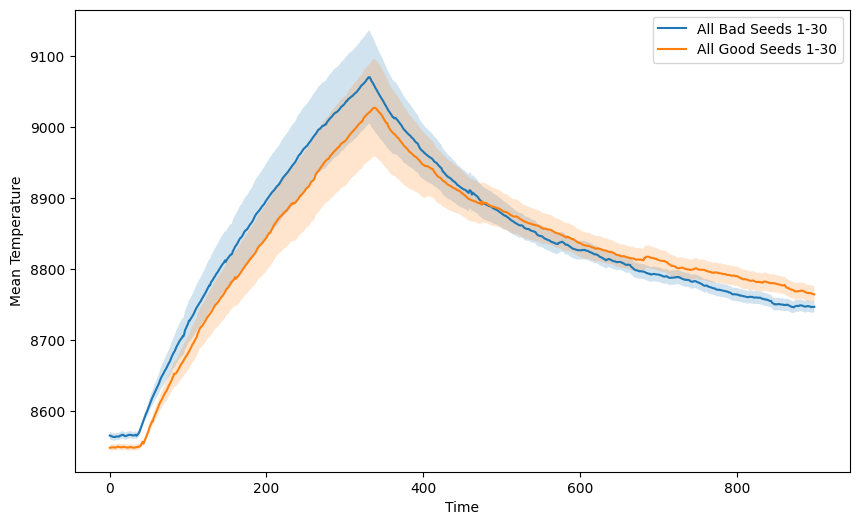

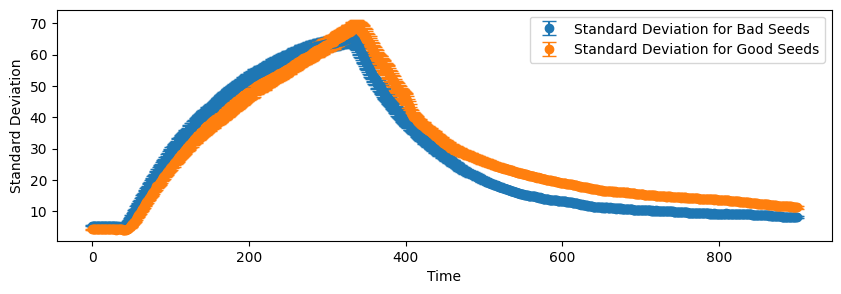

In [16]:
# Create a figure with a single subplot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the mean curves for the first 5 seeds as a group
group1_mean = [seed_curve_mean[tag] for tag in seed_curve_mean.keys()]
ax.plot(np.mean(group1_mean, axis=0), label='All Bad Seeds 1-30')
group1_seeds_std = [seed_curve_std[tag] for tag in seed_curve_mean.keys()]
group1_seeds_stderr = [seed_curve_std[tag] / np.sqrt(len(seed_curve_std[tag])) for tag in seed_curve_mean.keys()]
ax.fill_between(range(len(group1_seeds_std[0])), np.mean(group1_mean, axis=0) - np.mean(group1_seeds_std, axis=0), np.mean(group1_mean, axis=0) + np.mean(group1_seeds_std, axis=0), alpha=0.2)
group1_mean2 = [seed_curve_mean2[tag2] for tag2 in seed_curve_mean2.keys()]
ax.plot(np.mean(group1_mean2, axis=0), label='All Good Seeds 1-30')
group1_seeds_std2 = [seed_curve_std2[tag2] for tag2 in seed_curve_mean2.keys()]
group1_seeds_stderr2 = [seed_curve_std2[tag2] / np.sqrt(len(seed_curve_std2[tag2])) for tag2 in seed_curve_mean2.keys()]
ax.fill_between(range(len(group1_seeds_std2[0])), np.mean(group1_mean2, axis=0) - np.mean(group1_seeds_std2, axis=0), np.mean(group1_mean2, axis=0) + np.mean(group1_seeds_std2, axis=0), alpha=0.2)


# Set the axis labels and legend
ax.set_ylabel('Mean Temperature')
ax.set_xlabel('Time')
ax.legend()

# Add the standard deviation as a separate error bar plot
fig, ax2 = plt.subplots(figsize=(10, 3))
ax2.errorbar(range(len(group1_seeds_std[0])), np.mean(group1_seeds_std, axis=0), yerr=np.mean(group1_seeds_stderr, axis=0), fmt='o', capsize=5, label='Standard Deviation for Bad Seeds')
ax2.errorbar(range(len(group1_seeds_std2[0])), np.mean(group1_seeds_std2, axis=0), yerr=np.mean(group1_seeds_stderr2, axis=0), fmt='o', capsize=5, label='Standard Deviation for Good Seeds')
ax2.set_ylabel('Standard Deviation')
ax2.set_xlabel('Time')
ax2.legend()

# Show the plot
plt.show()

In [21]:
import csv

# Open a new file for writing
with open('./csv_data/30bad.csv', 'w', newline='') as csvfile:

    # Create a CSV writer object
    writer = csv.writer(csvfile)

    # Write the header row
    writer.writerow(['Seed'] + list(range(900)))

    # Write the data rows
    for seed, curve in seed_curve_mean.items():
        writer.writerow([seed] + list(curve))
